<a href="https://colab.research.google.com/github/Sarth-k/Air-Quality-Index-Prediction/blob/main/Taabi_Mobility_Data_Analysis_Python_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Analyzing Vehicle Dataset***

# **Importing Libraries and Dataset**

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [9]:
# Load the dataset
df = pd.read_excel('/content/Data Science - Intern - Data Set.xlsx')

In [10]:
#removing empty columns in dataset
df = df.dropna(axis=1, how='all')

In [11]:
df = df.drop(columns=['can_raw_data','pluscode'])

In [12]:
# Display the first few rows of the dataset
print(df.head())

       uniqueid          ts        lat        lng  engineload  coolant  \
0  it_220403501  1709340731  19.069340  78.355148          28       33   
1  it_220403501  1709340794  19.069347  78.355141          22       41   
2  it_220403501  1709340857  19.069414  78.355179          25       48   
3  it_220403501  1709340920  19.069258  78.355225          35       52   
4  it_220403501  1709340983  19.069094  78.355339           0       57   

   engineoiltemp  vehiclespeed       rpm  obddistance  ...  \
0      1774.9688       0.00000   749.000     60780800  ...   
1      1774.9688       0.00000  1208.375     60780800  ...   
2      1774.9688       1.40625   752.625     60780800  ...   
3      1774.9688       2.81250   996.375     60780820  ...   
4      1774.9688       4.53125  1065.750     60780840  ...   

   engine_throttle_valve1_pos  engine_throttle_valve2_pos  enginefueltemp  \
0                       100.0                         102             215   
1                        99.

In [13]:
# Encoding categorical variable
#Pressed = 0 & Released = 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['brake_switch_status', 'clutch_switch_status', 'parking_switch_status']:df[col] = le.fit_transform(df[col])

In [14]:
# Get basic info about the dataset (column names, data types, and missing values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   uniqueid                              18434 non-null  object 
 1   ts                                    18434 non-null  int64  
 2   lat                                   18434 non-null  float64
 3   lng                                   18434 non-null  float64
 4   engineload                            18434 non-null  int64  
 5   coolant                               18434 non-null  int64  
 6   engineoiltemp                         18434 non-null  float64
 7   vehiclespeed                          18434 non-null  float64
 8   rpm                                   18434 non-null  float64
 9   obddistance                           18434 non-null  int64  
 10  runtime                               18420 non-null  float64
 11  engine_torque_p

In [15]:
# Check summary statistics for numerical columns
print(df.describe())

                 ts           lat           lng    engineload       coolant  \
count  1.843400e+04  18434.000000  18434.000000  18434.000000  18434.000000   
mean   1.711641e+09     18.724254     78.865351     38.141206     84.571336   
std    1.275937e+06      0.816184      3.208032     29.889358      7.718346   
min    1.709341e+09      0.000000      0.000000      0.000000     30.000000   
25%    1.710903e+09     18.701308     78.758909     10.000000     83.000000   
50%    1.711692e+09     18.853032     79.092408     31.000000     85.000000   
75%    1.712682e+09     18.921385     79.352821     64.000000     89.000000   
max    1.713636e+09     19.069500     79.481804    100.000000     98.000000   

       engineoiltemp  vehiclespeed           rpm   obddistance       runtime  \
count   1.843400e+04  18434.000000  18434.000000  1.843400e+04  18420.000000   
mean    1.774969e+03     33.361762    937.044090  6.650076e+07   2132.411732   
std     4.547597e-13     17.929579    327.003819

# Handling Missing Values

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 uniqueid                                   0
ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
vibration_status                           0
engine_throttle_valve1_

In [17]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(df[['runtime','fuel_level','adblue_level']])
df[['runtime','fuel_level','adblue_level']]= imp.transform(df[['runtime','fuel_level','adblue_level']])

In [ ]:
# Remove duplicate rows, if any
df = df.drop_duplicates()


# Finding Outliers

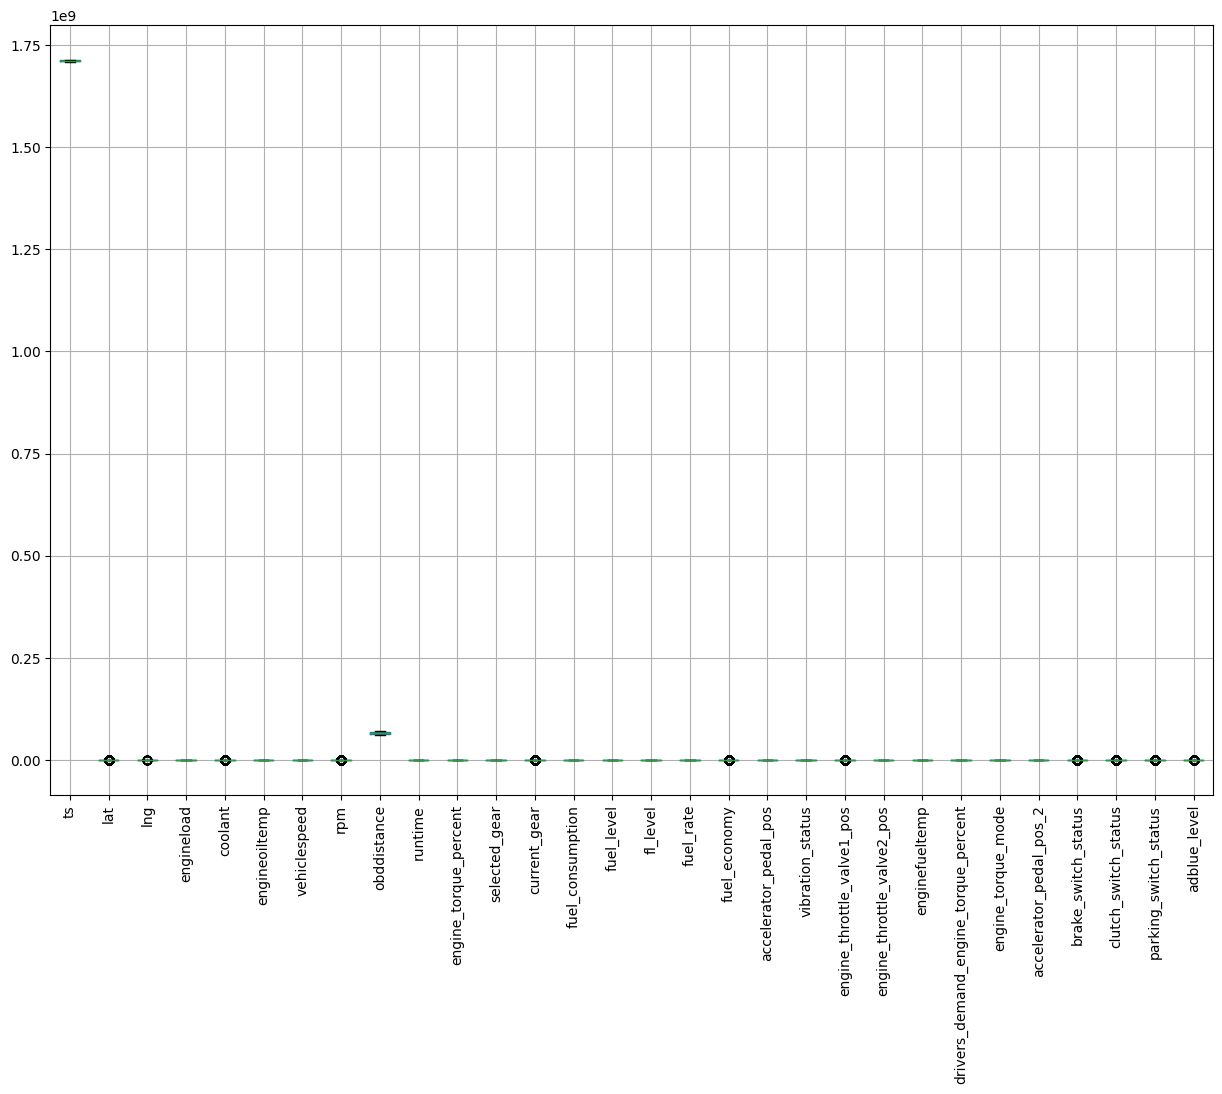

In [18]:
# Plot boxplot for all numerical columns to detect outliers
df.boxplot(figsize=(15, 10))
plt.xticks(rotation=90)
plt.show()

In [19]:
df.shape

(18434, 31)

## **Exploratory Data Analysis (EDA)**

# Univariate Analysis:

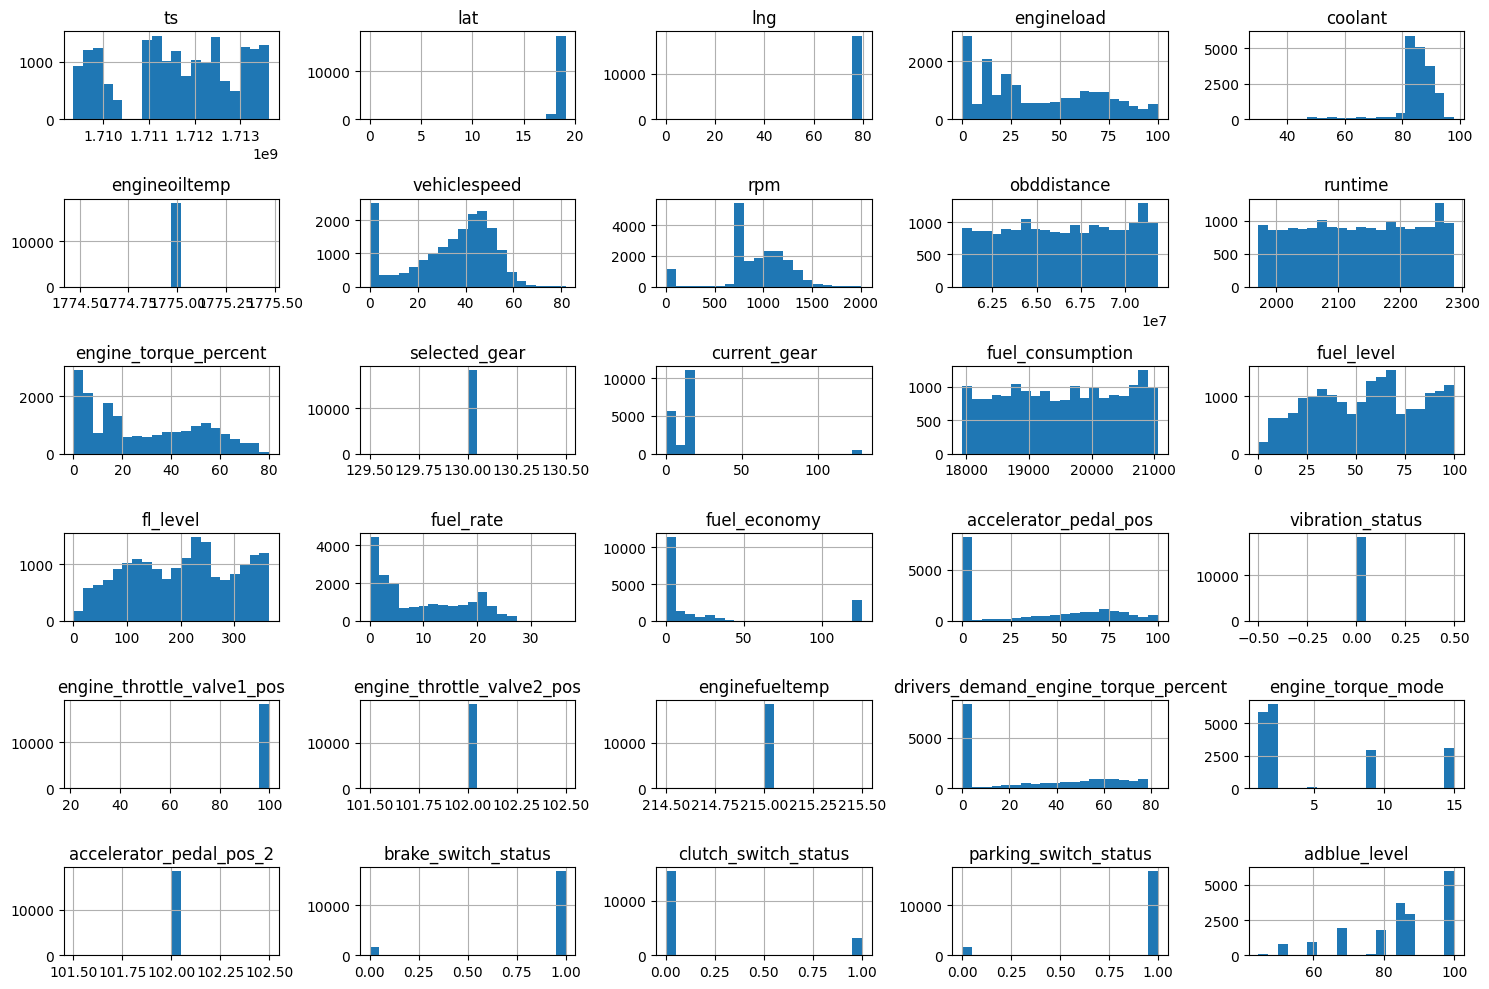

In [20]:
# Plot histograms for all numerical features
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()




Axes(0.125,0.11;0.775x0.77)


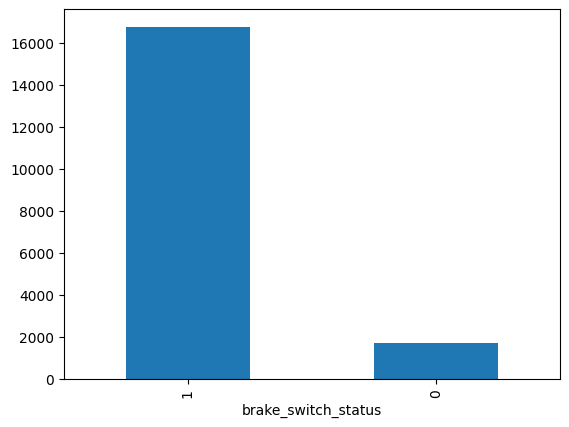

In [21]:
# Visualize categorical columns using bar plots
print(df['brake_switch_status'].value_counts().plot(kind='bar'))


Axes(0.125,0.11;0.775x0.77)


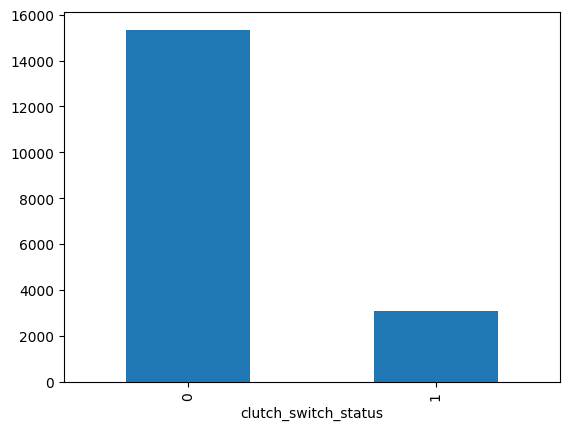

In [22]:
print(df['clutch_switch_status'].value_counts().plot(kind='bar'))


Axes(0.125,0.11;0.775x0.77)


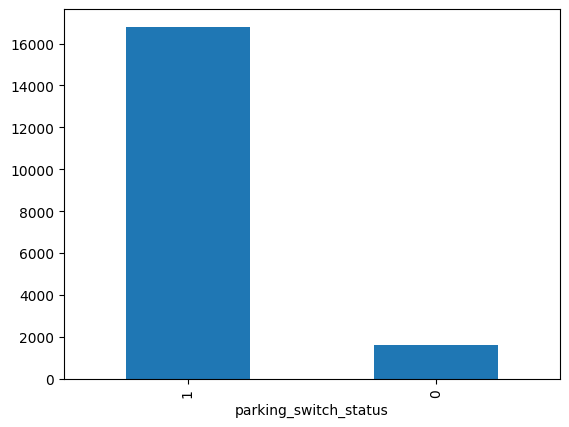

In [23]:
print(df['parking_switch_status'].value_counts().plot(kind='bar'))

In [24]:
df = df.drop(columns=['uniqueid'])

# Bivariate Analysis

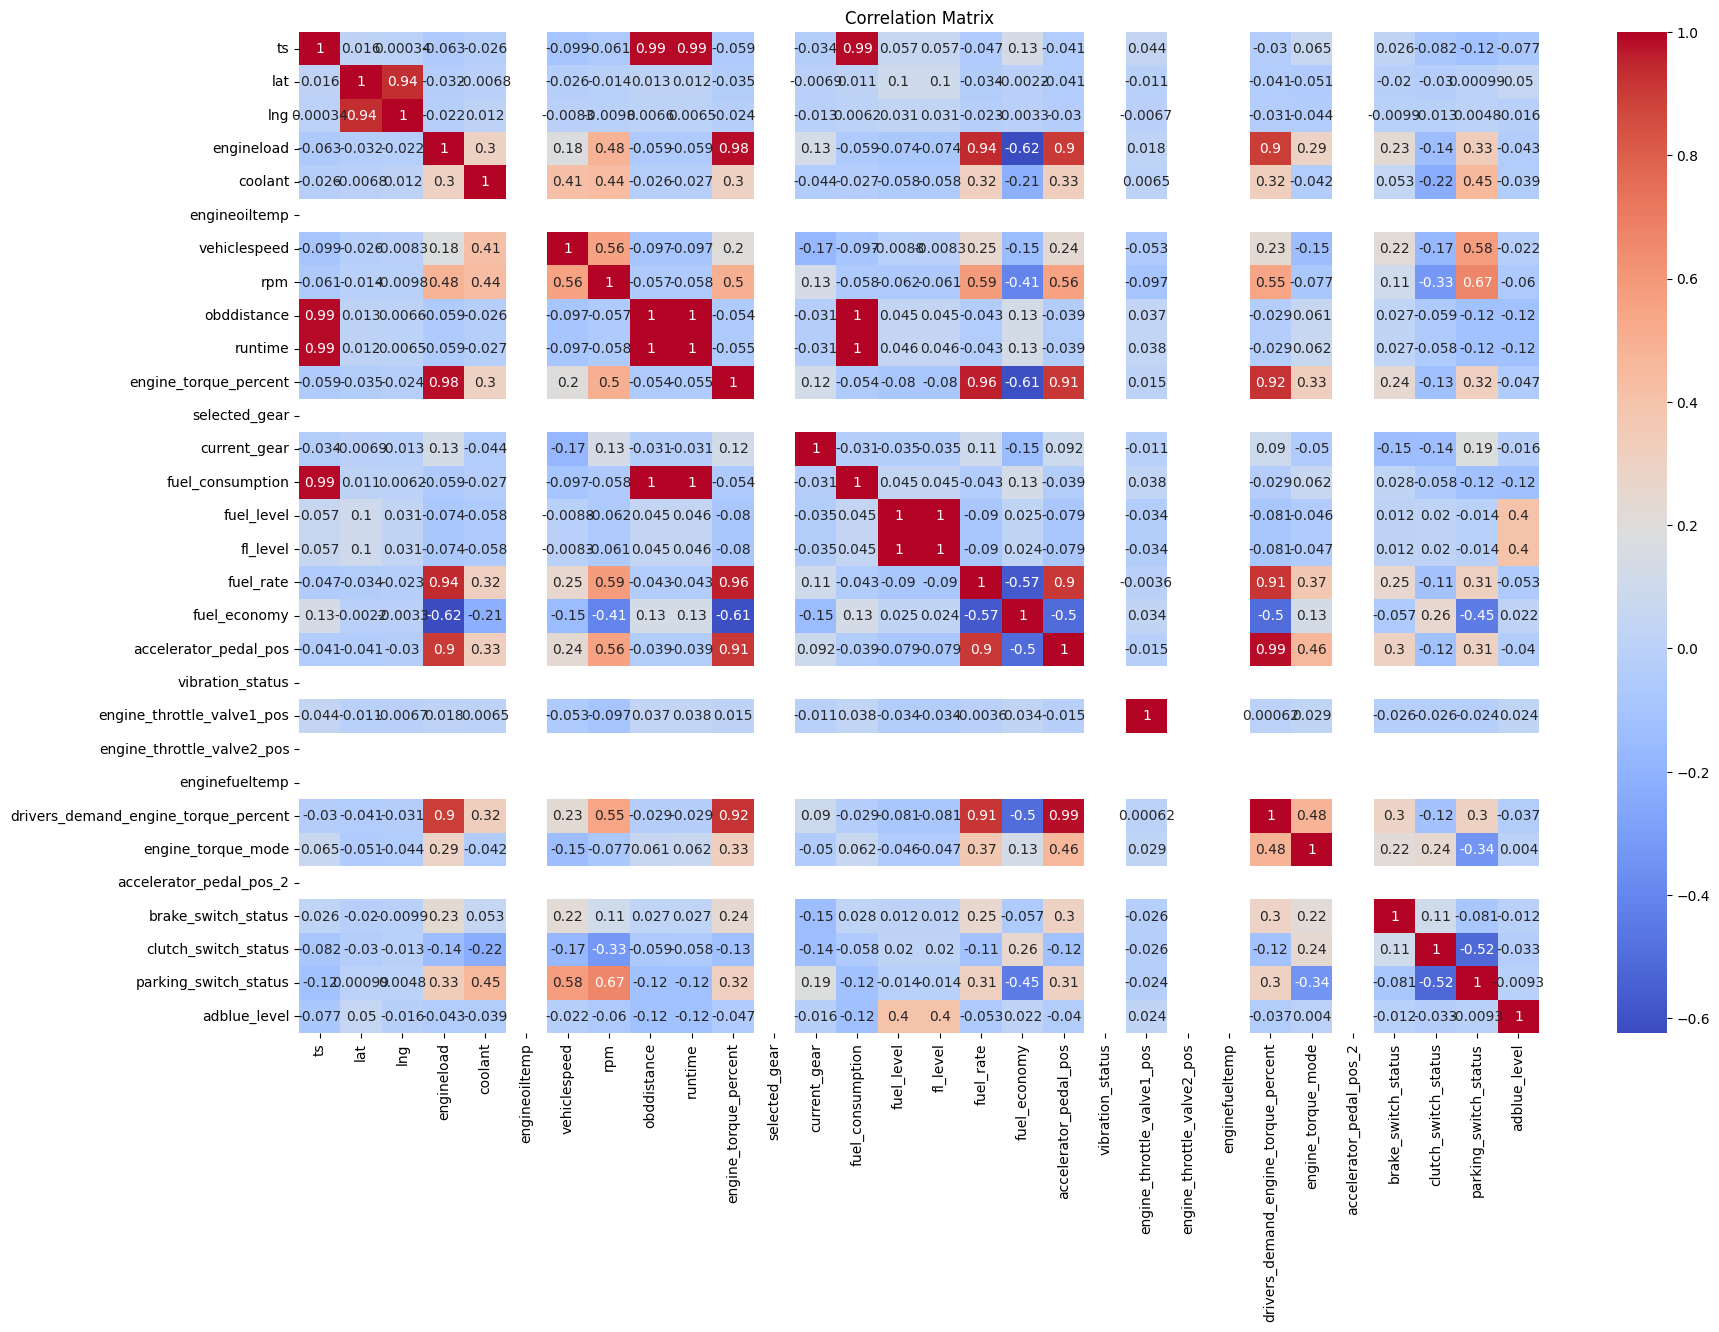

In [27]:
# Plot a correlation matrix to find relationships between features
plt.figure(figsize=(20, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




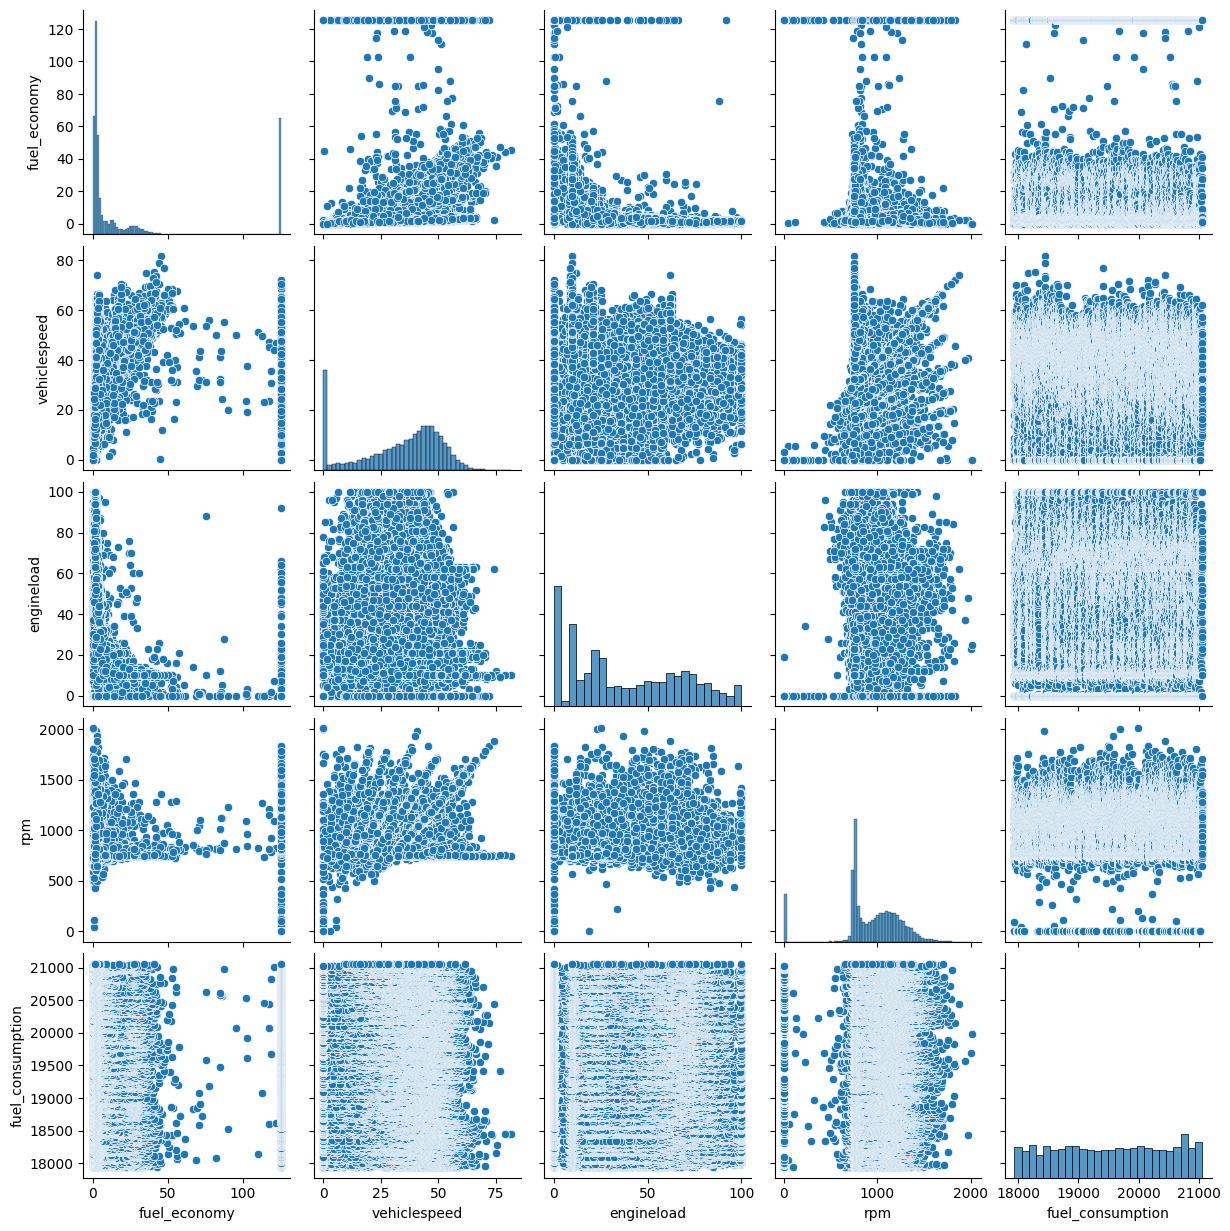

In [28]:
# Scatter plots between fuel efficiency and key features
sns.pairplot(df[['fuel_economy', 'vehiclespeed', 'engineload', 'rpm', 'fuel_consumption']])
plt.show()

In [30]:
# Create a new feature: Torque-to-RPM ratio
df['torque_to_rpm_ratio'] = df['engine_torque_percent'] / df['rpm']

# Example: Create a feature for distance traveled (approximation using speed and time)
# Assuming 'runtime' is in seconds
df['distance_traveled'] = (df['vehiclespeed'] * df['runtime']) / 3600  # converting speed to distance

# Normalize/Standardize certain features if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['lat', 'lng', 'vehiclespeed']] = scaler.fit_transform(df[['lat', 'lng', 'vehiclespeed']])

# Trying to find "How to increase Fuel Efficiency"

In [32]:
# Correlation with fuel efficiency
fuel_efficiency_corr = df.corr()['fuel_economy'].sort_values(ascending=False)
print("Correlation with fuel efficiency:\n", fuel_efficiency_corr)




Correlation with fuel efficiency:
 fuel_economy                            1.000000
clutch_switch_status                    0.255875
ts                                      0.131413
engine_torque_mode                      0.126270
fuel_consumption                        0.126148
runtime                                 0.126096
obddistance                             0.125380
engine_throttle_valve1_pos              0.033948
fuel_level                              0.024709
fl_level                                0.024187
adblue_level                            0.021630
lat                                    -0.002174
lng                                    -0.003275
brake_switch_status                    -0.056918
vehiclespeed                           -0.150622
current_gear                           -0.154218
distance_traveled                      -0.154468
coolant                                -0.211355
rpm                                    -0.411809
parking_switch_status             

# Summarize the results
Insights:
Engine Load, Torque, and Fuel Rate have the strongest negative correlations with fuel economy, indicating that higher power demands significantly reduce fuel efficiency.

Driver behavior (as indicated by accelerator pedal position, RPM, and gear usage) has a notable impact on fuel efficiency, showing that smoother driving with less aggressive acceleration can lead to better fuel economy.

Clutch engagement shows a positive impact, suggesting that proper gear management can contribute to improving fuel efficiency.






# **Driver Behavior Impact on Fuel Consumption**

Driver Behavior Correlation with Fuel Consumption:
                        fuel_consumption  accelerator_pedal_pos  \
fuel_consumption               1.000000              -0.039170   
accelerator_pedal_pos         -0.039170               1.000000   
brake_switch_status            0.027549               0.300095   

                       brake_switch_status  
fuel_consumption                  0.027549  
accelerator_pedal_pos             0.300095  
brake_switch_status               1.000000  


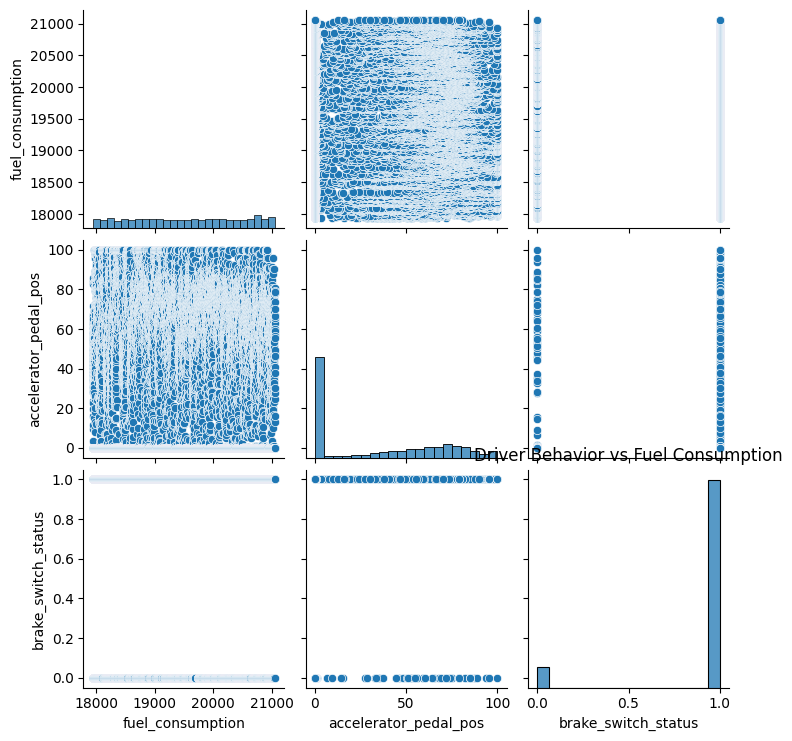

Insights on Driver Behavior:
1. High accelerator pedal position is positively correlated with higher fuel consumption, indicating aggressive driving.
2. Frequent braking (brake switch status) tends to reduce fuel efficiency, suggesting more fuel is consumed in stop-and-go conditions.


In [ ]:
# Correlation between driver behavior and fuel consumption
behavior_corr = df[['fuel_consumption', 'accelerator_pedal_pos', 'brake_switch_status']].corr()
print("Driver Behavior Correlation with Fuel Consumption:\n", behavior_corr)

# Visualization
sns.pairplot(df[['fuel_consumption', 'accelerator_pedal_pos', 'brake_switch_status']])
plt.title('Driver Behavior vs Fuel Consumption')
plt.show()


# Insights on Driver Behavior:
* No strong correlation exists between fuel consumption and
accelerator pedal position or brake switch status in this dataset, meaning driver behavior like braking or pedal pressing alone doesn't drastically impact fuel usage.

* However, the moderate correlation between accelerator pedal position and brake switch status suggests that aggressive driving behavior (rapid acceleration and braking) might indirectly affect fuel consumption, but it's not captured strongly in this data.

* Recommendation: Further investigation into other variables like vehicle speed, engine load, and gear changes might reveal more significant impacts of driver behavior on fuel consumption.

# **Vehicle Speed and Fuel Consumption Patterns**

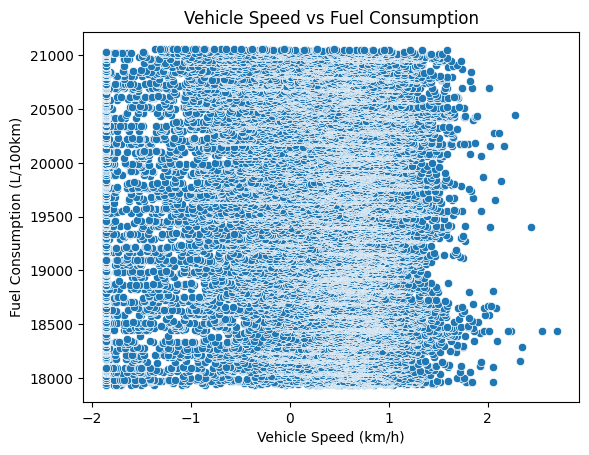

Correlation between Vehicle Speed and Fuel Consumption:
                   vehiclespeed  fuel_consumption
vehiclespeed           1.00000          -0.09663
fuel_consumption      -0.09663           1.00000


In [ ]:
# Analyzing the relationship between vehicle speed and fuel consumption
sns.scatterplot(data=df, x='vehiclespeed', y='fuel_consumption')
plt.title('Vehicle Speed vs Fuel Consumption')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()

# Correlation between speed and fuel consumption
speed_fuel_corr = df[['vehiclespeed', 'fuel_consumption']].corr()
print("Correlation between Vehicle Speed and Fuel Consumption:\n", speed_fuel_corr)



# Final Result and Insight for Vehicle Speed and Fuel Consumption
The weak negative correlation suggests that increasing vehicle speed slightly reduces fuel consumption in this dataset. However, this relationship is not strong, and there might be other factors influencing fuel consumption more significantly (e.g., engine load, driving conditions, vehicle weight).

Recommendation:

Although there is a slight reduction in fuel consumption with increased speed, optimal speeds (such as 60-80 km/h) should be targeted for maximizing fuel efficiency.
Further investigation into factors like engine load and gear selection could provide a clearer understanding of fuel consumption trends at various speeds.

# **Engine Health Analysis**

Correlation between Engine Health Factors and Fuel Consumption:
                   fuel_consumption  engineload   coolant  engineoiltemp
fuel_consumption          1.000000   -0.058663 -0.027478            NaN
engineload               -0.058663    1.000000  0.301353            NaN
coolant                  -0.027478    0.301353  1.000000            NaN
engineoiltemp                  NaN         NaN       NaN            NaN


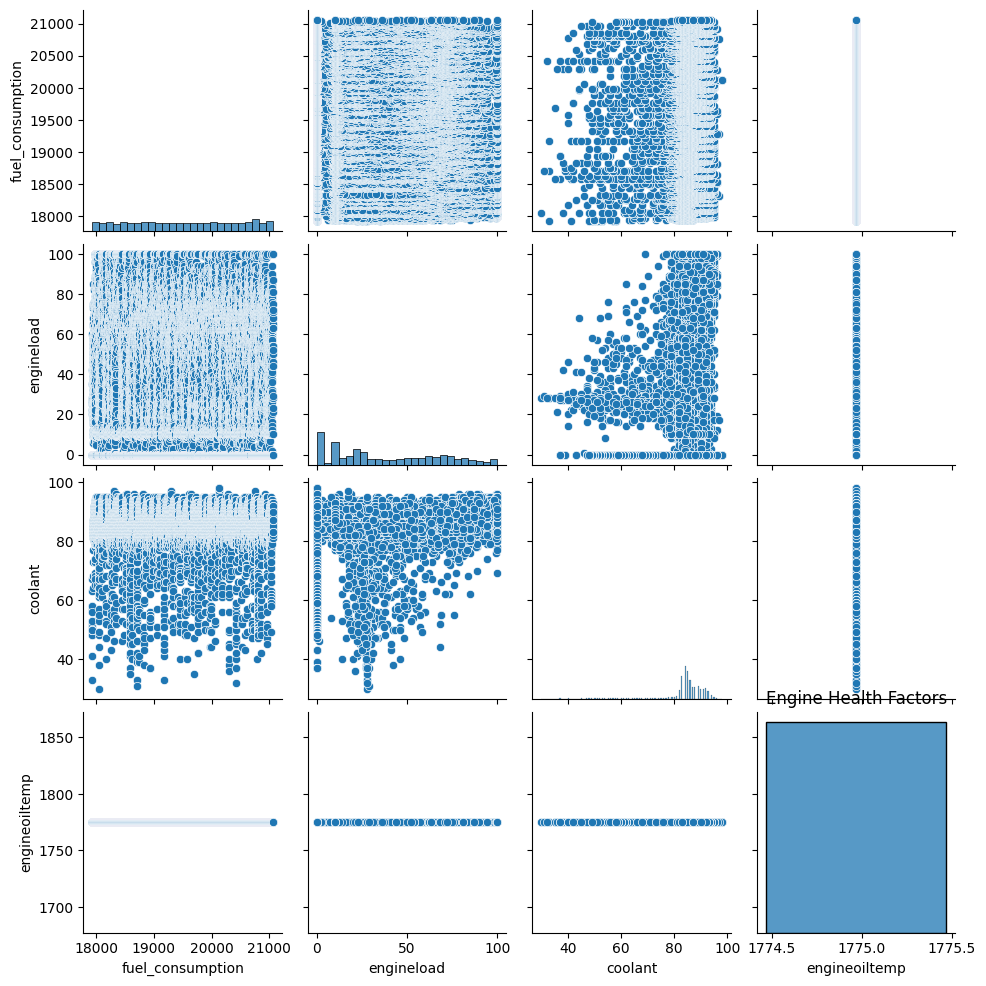

Insights on Engine Health:
1. High engine load is associated with increased fuel consumption.
2. Higher coolant and engine oil temperatures may indicate engine inefficiency, leading to higher fuel usage.
3. Maintaining proper engine oil and coolant temperature is critical for fuel efficiency and engine health.


In [ ]:
# Correlation matrix for engine-related factors
engine_corr = df[['fuel_consumption', 'engineload', 'coolant', 'engineoiltemp']].corr()
print("Correlation between Engine Health Factors and Fuel Consumption:\n", engine_corr)

# Visualization
sns.pairplot(df[['fuel_consumption', 'engineload', 'coolant', 'engineoiltemp']])
plt.title('Engine Health Factors')
plt.show()

# Insights
print("Insights on Engine Health:")
print("1. High engine load is associated with decrease fuel consumption.")
print("2. Higher coolant and engine oil temperatures may indicate engine inefficiency, leading to higher fuel usage.")
print("3. Maintaining proper engine oil and coolant temperature is critical for fuel efficiency and engine health.")


#Final Result and Insight for Engine Health:
* Engine Load and Coolant Temperature are moderately correlated, meaning higher engine loads lead to higher engine temperatures.
* Fuel consumption shows no strong correlation with engine health factors like engine load and coolant temperature, suggesting that other factors (like speed, route, and driving behavior) might have a greater impact on fuel consumption.





# **Geographical Influence on Fuel Efficiency**

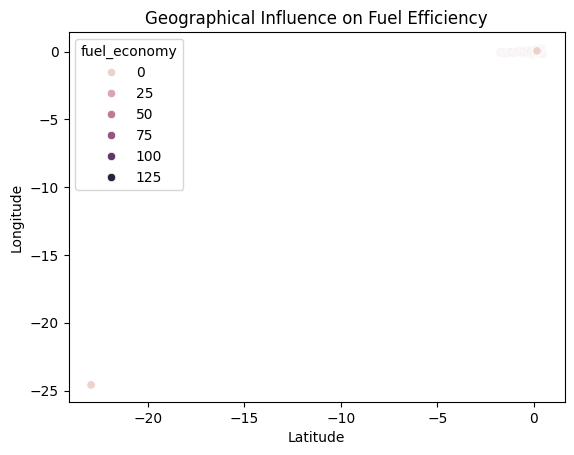

In [ ]:
# Standardizing latitude and longitude
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['lat', 'lng']] = scaler.fit_transform(df[['lat', 'lng']])

# Scatterplot for geographical factors vs fuel efficiency
sns.scatterplot(data=df, x='lat', y='lng', hue='fuel_economy')
plt.title('Geographical Influence on Fuel Efficiency')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()



# **RPM vs Torque Analysis**

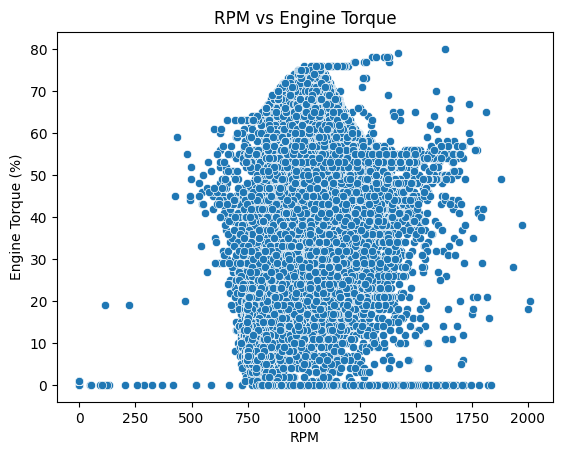

Correlation between RPM and Engine Torque:
                             rpm  engine_torque_percent
rpm                    1.000000               0.504514
engine_torque_percent  0.504514               1.000000


In [33]:
# Scatterplot of RPM vs Engine Torque
sns.scatterplot(data=df, x='rpm', y='engine_torque_percent')
plt.title('RPM vs Engine Torque')
plt.xlabel('RPM')
plt.ylabel('Engine Torque (%)')
plt.show()

# Correlation between RPM and torque
rpm_torque_corr = df[['rpm', 'engine_torque_percent']].corr()
print("Correlation between RPM and Engine Torque:\n", rpm_torque_corr)



# Insights on RPM and Torque:

* Higher RPMs with low torque:

Indicates engine inefficiency, as the engine is revving high but not delivering sufficient torque (power). This could lead to increased fuel consumption, as the engine burns more fuel without producing proportionate power output.
Impact: Prolonged operation at high RPM with low torque is inefficient and can degrade fuel efficiency over time.

* Maintaining a balance between RPM and torque:

Optimal fuel performance is achieved when the engine operates at a balance between moderate RPM and sufficient torque. Keeping RPMs lower while ensuring adequate torque is key to fuel efficiency.

* Impact: Efficient driving habits, such as smooth acceleration and avoiding unnecessary high RPMs, can improve overall fuel economy and reduce engine wear.